Optimized parameters: A = 0.09991582649567274, omega = 1.109496644274743, phi = 3.238748342926035


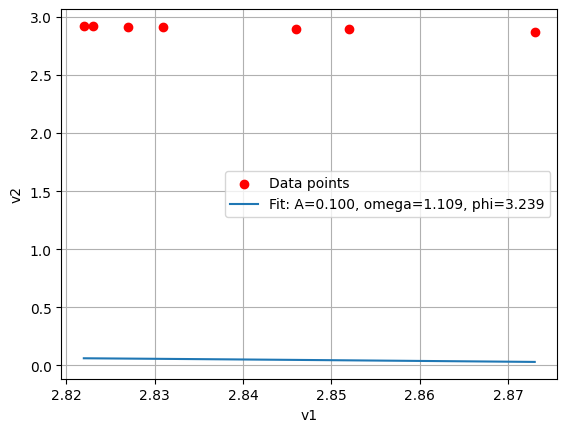

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

def cos_model(x, A, omega, phi):
    return np.abs(A * np.cos(2*np.pi *omega* x + phi))

v1 = np.array([2.823, 2.831, 2.852, 2.873, 2.846, 2.827, 2.822])
v2 = np.array([2.920, 2.912, 2.894, 2.873, 2.900, 2.918, 2.923])


y=np.abs(v1-v2)
x=np.array([0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3,5*np.pi/6,np.pi])

def cost_function(params, x, y):
    A, omega, phi = params
    y_pred = cos_model(x, A, omega, phi)
    return np.sum((y - y_pred) ** 2)

initial_guess = [0.01, 1, 0]
bounds = [(0.001, 0.2),  # A: amplitude must be positive
          (0, 2),  # omega: frequency bounds
          (0, 2*np.pi)]  # phi: phase shift bounds

result = differential_evolution(cost_function, bounds, args=(x, y))

A_opt, omega_opt, phi_opt = result.x
print(f"Optimized parameters: A = {A_opt}, omega = {omega_opt}, phi = {phi_opt}")

# Plot the data points and the fitted curve
v1_fit = np.linspace(min(v1), max(v1), 100)
v2_fit = cos_model(v1_fit, A_opt, omega_opt, phi_opt)

plt.scatter(v1, v2, color='red', label='Data points')
plt.plot(v1_fit, v2_fit, label=f'Fit: A={A_opt:.3f}, omega={omega_opt:.3f}, phi={phi_opt:.3f}')
plt.xlabel('v1')
plt.ylabel('v2')
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'separation (GHz)')

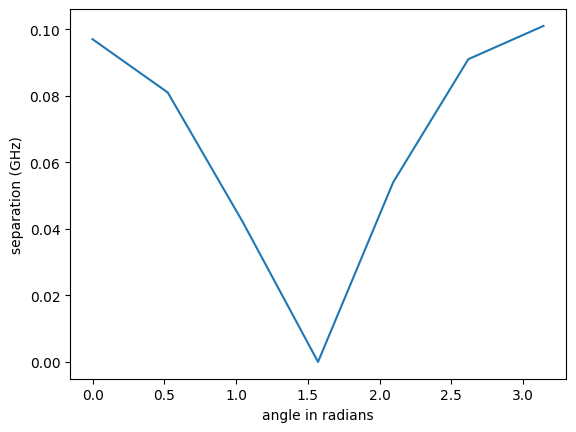

In [25]:
plt.plot(x,y)
plt.xlabel('angle in radians')
plt.ylabel('separation (GHz)')

In [26]:
(6.6 * 15 * 1e6)/(2*9.3 * 0.2 * np.sqrt(5))

11901652.13830533